## SVM

### Methodology
*   ###### **Data Cleaning:** Checking for null values and based on their number either droping them or replacing with mean, median, mode based on the type and description of data. Droping decscrete and catagorical variables that have highly skewed histograms.
*   ###### **Data Visualization:** This step helps understand the understand the data in a visually. We can understand normality of the data as well. This helps us to decide whether to normalize the data. In case of catagorical variables it also helps in feature selection.
*   ###### **Feature Selection:** Based on the Pearson correlation between the labeled column and rest of the features. In general, a very great correlation should have an absolute value greater than 0.75. When the labeled column is depended on multiple columns, the correlation with one column may be less. But combined features may have higher effect.
*   ######  **Train Test Split:** We split the data into 80:20 ratio for tarining testing respectively.
*   ###### **Model Selection:** Based on the data visualization and data correlation, we need to select a model that would best suit. Here we need to use SVM.

*   ###### **Evalution:** In this case we are using F1 Score to determine the accuracy of the predicting model.


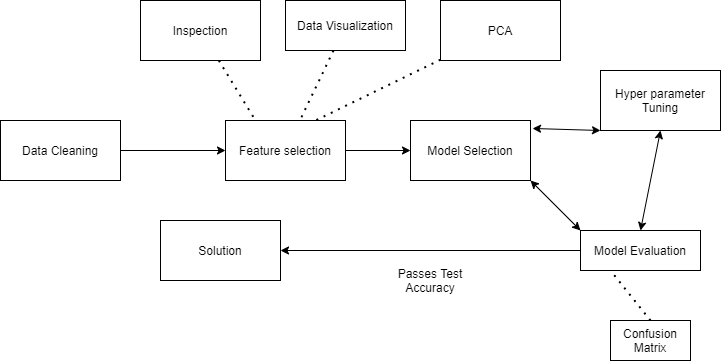

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel("drive/My Drive/voice.xlsx")

In [4]:
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [5]:
df.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

NO Null values

In [7]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [8]:
df["label"]=df["label"].replace('male',1)
df["label"]=df["label"].replace('female',2)
df["label"].unique()

array([1, 2])

In [9]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label         int64
dtype: object

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


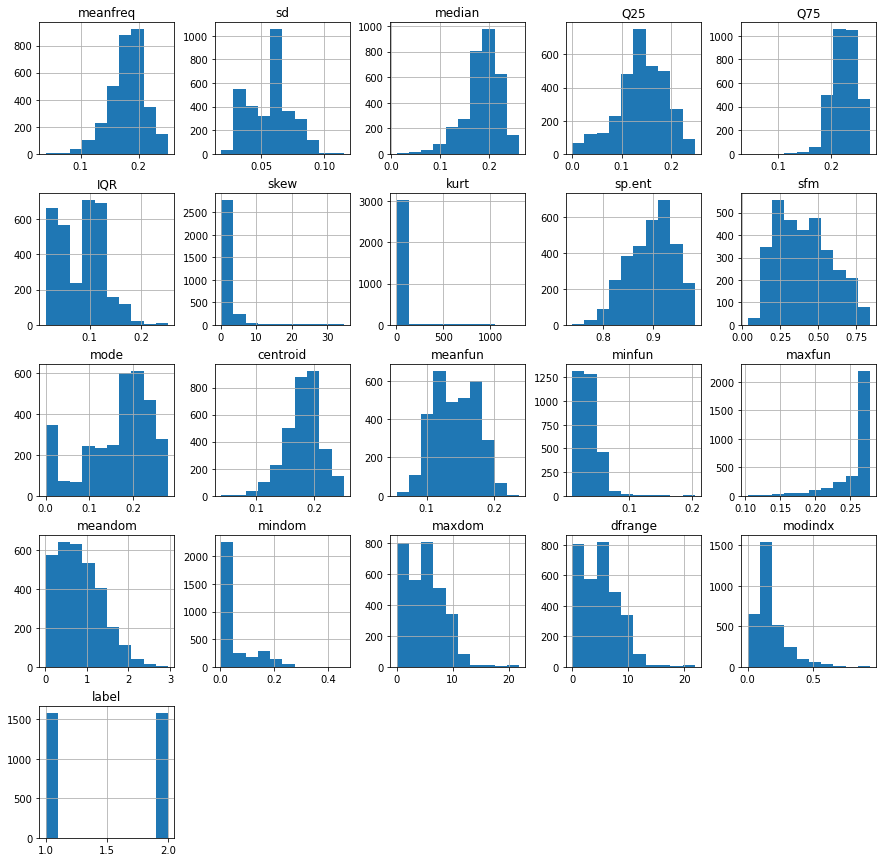

In [12]:
c=list(df)
fig=plt.figure(figsize=(15,15))
ax=fig.gca()
df[c].hist(ax=ax)
plt.show()

Kurtand skew has most of the values as only one value so removing it will not make any difference in decision making.


The label data is balanced, so no need for sampling.

In [13]:
df=df.drop(["kurt","skew"],axis=1)
df

,meanfreq,sd,median,Q25,Q75,IQR,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,2
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,2
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,2
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,2


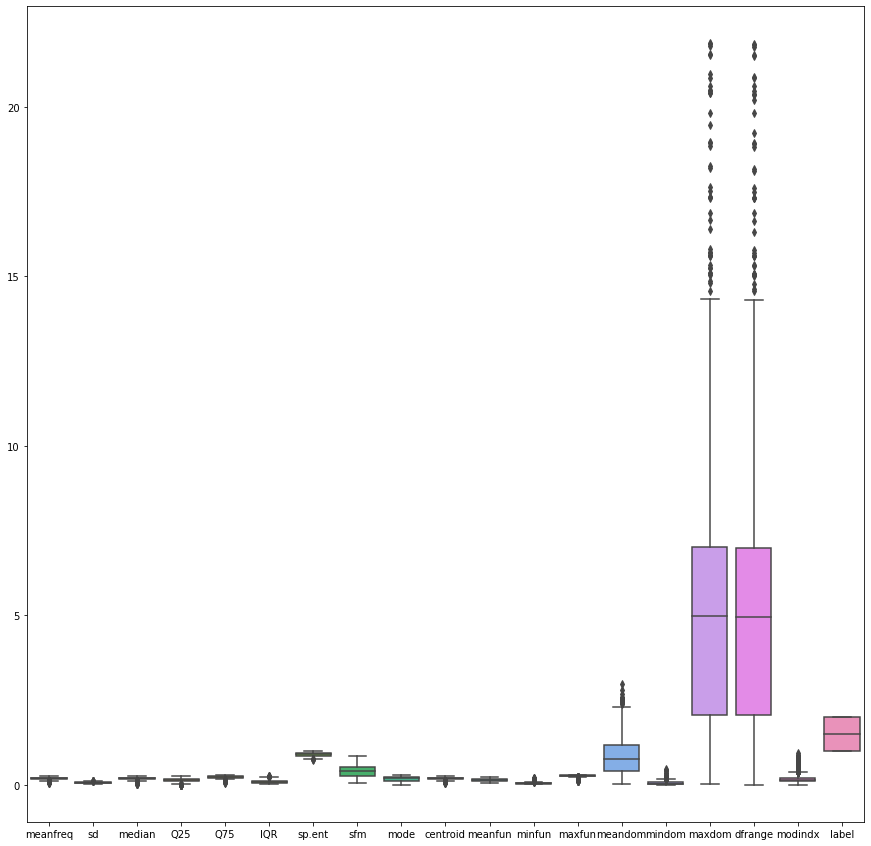

In [20]:
import seaborn as sns
ax=plt.figure(figsize=(15,15))
sns.boxplot(data=df)

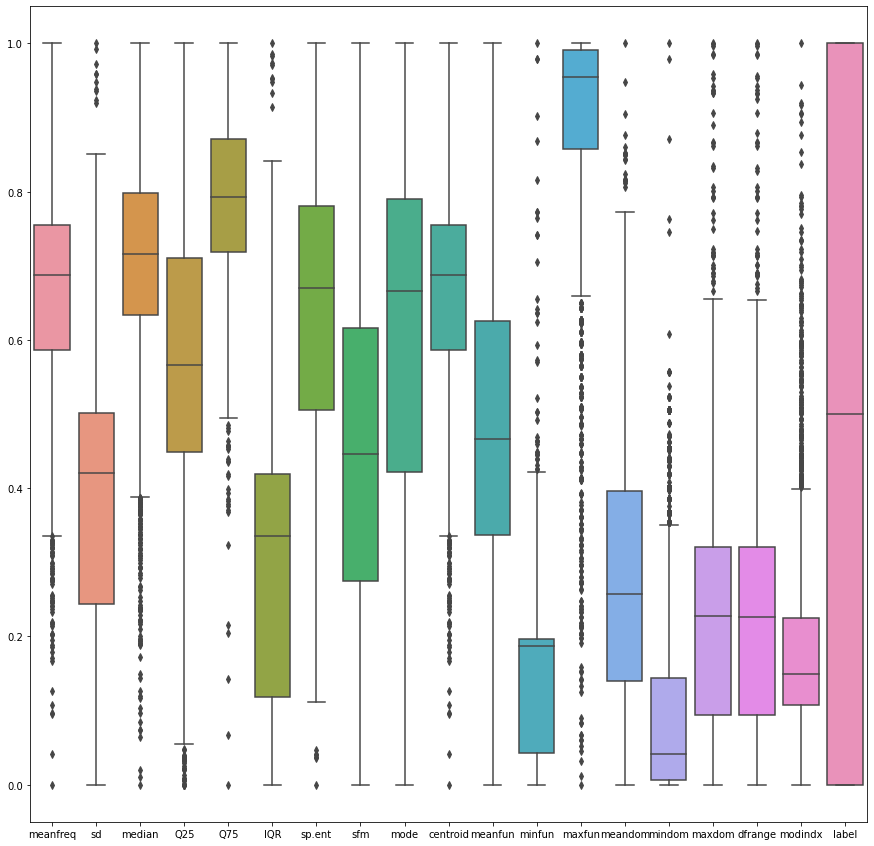

In [21]:
df_norm = (df - df.min()) / (df.max() - df.min())
ax=plt.figure(figsize=(15,15))
sns.boxplot(data=df_norm) # boxplot for normalized data

In [22]:
cols = [col for col in df.columns if col not in ["label"]]
X = df[cols]
y = df["label"]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

##### Logistic

In [24]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
from sklearn.metrics import classification_report
p_train = clf.predict(X_train)
p_test = clf.predict(X_test)

In [27]:
print(classification_report(y_train, p_train, target_names=["male","female"])) # report on train data

              precision    recall  f1-score   support

        male       0.87      0.98      0.92      1279
      female       0.97      0.85      0.90      1255

    accuracy                           0.91      2534
   macro avg       0.92      0.91      0.91      2534
weighted avg       0.92      0.91      0.91      2534



In [28]:
print(classification_report(y_test, p_test, target_names=["male","female"])) # report on test data

              precision    recall  f1-score   support

        male       0.83      0.98      0.90       305
      female       0.97      0.82      0.89       329

    accuracy                           0.90       634
   macro avg       0.90      0.90      0.90       634
weighted avg       0.91      0.90      0.90       634



In [31]:
from sklearn.metrics import confusion_matrix
confm=confusion_matrix(y_test, p_test, labels=[1,2]) # confusion matrix on test data
confm

array([[298,   7],
       [ 59, 270]])

There is less variance in the model

#### SVM

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C' : [0.01, 0.1, 1, 10], 'kernel': ('rbf', 'linear')}
classifier = SVC()
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring='accuracy', n_jobs=-1, verbose=42)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'kernel': ('rbf', 'linear')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=42)

In [34]:
p_train = grid_search.predict(X_train)
p_test = grid_search.predict(X_test)

In [35]:
print(classification_report(y_train, p_train, target_names=["male","female"])) # report on train data

              precision    recall  f1-score   support

        male       0.96      0.98      0.97      1279
      female       0.98      0.96      0.97      1255

    accuracy                           0.97      2534
   macro avg       0.97      0.97      0.97      2534
weighted avg       0.97      0.97      0.97      2534



In [36]:
print(classification_report(y_test, p_test, target_names=["male","female"])) # report on test data

              precision    recall  f1-score   support

        male       0.96      0.96      0.96       305
      female       0.97      0.97      0.97       329

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



In [37]:
from sklearn.metrics import confusion_matrix
confm=confusion_matrix(y_test, p_test, labels=[1,2]) # confusion matrix on test data
confm

array([[294,  11],
       [ 11, 318]])

The error has redused and the accuracy increased in both classes. The model has better bias and variance scores than Logistic regression.